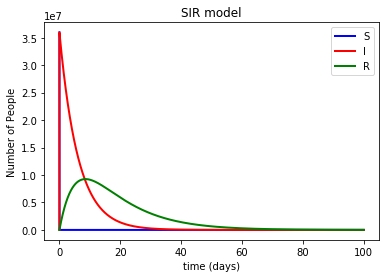

In [4]:
import numpy as np 
import math as m
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#The numbers used here are just set as templates to confirm the program works

#SIR model function with vital constants
def SIR(x,t):
    B = 2 #number of contacts per day * probability of transmission per contact 
    A = 1 #birth rate (births per day)
    D = 12
    y = 1/D #fixed fraction of people who recover per day
    u = 0.08 # death rate (fatalities per day) 
    s = x[0] #the number of people suceptible 
    i = x[1] # the number of people infected
    r = x[2] # the number of people recovered
    N = s+i+r #total population
    dsdt = A-u*s-B*i*s/N # DE for the suceptible population 
    didt = B*i*s/N-y*i-u*i  # DE for the infected population 
    drdt = y*i-u*r # DE for the recovered population 
    return [dsdt, didt, drdt]


x0 = [3.6*10**7,1,0] #initial condition (suceptible population, infected population, recovered population)
t = np.linspace(0,100,10000) #the number of days the program will run on 
x = odeint(SIR,x0,t)

#defines the SIR model solved equations 
S = x[:,0] 
I = x[:,1]
R = x[:,2]

#plots the functions
plt.plot(t,S,'b-',linewidth=2, label = "S")
plt.plot(t,I,'r-',linewidth=2, label = "I")
plt.plot(t,R,'g-',linewidth=2,label = "R")
plt.xlabel('time (days)')
plt.ylabel('Number of People')
plt.title('SIR model')
plt.legend()
plt.show()



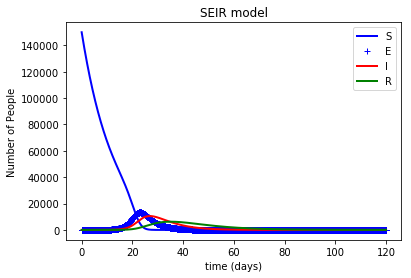

In [5]:
#The function does not work as intended 
def SEIR (x,t): 
    B = 2 #number of contacts per day * probability of transmission per contact
    A = 0.1 # number of average births per day 
    a = 1/5 #inverse average incubation period 
    y = 1/12 #fixed fraction of people who recover per day
    u = 0.08 # death rate (fatalities per day) 
    s = x[0] #the number of people suceptible 
    e = x[1] #the number of exposed people 
    i = x[2] # the number of people infected
    r = x[3] # the number of people recovered
    N = s+i+e+r #total population
    dsdt = A-B*s*i/N-u*s #DE for the suceptible population 
    dedt = B*i*s/N-e*a #De for exposed population
    didt = e*a-y*i-u*i #DE for the infected population 
    drdt = y*i-u*r #DE for the recovered population
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0,120,10000) #the number of days the program will run on 
sol0 = [1.5*10**5,0,1,0] #initial condition (suceptible population, exposed population, infected population,
#recovered population)
sol = odeint(SEIR,sol0,t)
#defines the SIR model solved equations 
S1 = sol[:,0] 
E1 = sol[:,1]
I1 = sol[:,2]
R1 = sol[:,3]

#plots the functions
plt.plot(t,S1,'b-',linewidth=2, label = "S")
plt.plot(t,E1,'b+',linewidth=2, label = "E")
plt.plot(t,I1,'r-',linewidth=2, label = "I")
plt.plot(t,R1,'g-',linewidth=2,label = "R")
plt.xlabel('time (days)')
plt.ylabel('Number of People')
plt.title('SEIR model')
plt.legend()
plt.show()